## This code is to find out the different of each epoch and batch size combination

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [2]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/googlenet/fashion_mnist/'
data_path2 = parent_path / 'Data/googlenet/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/code
The parent path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W
The data path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist
The data path is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/cifar100


### extract data

In [3]:
batch_sizes = [64]
epochs = [3]
rounds = 1

#### read all the data from all the folders

In [4]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E3_B64_R0'] ['E3_B64_R0']
The folder list is: ['E3_B64_R0']
The common folders are: ['E3_B64_R0'] ['E3_B64_R0']


### analysis data

#### find the data in same epoch and batch size

In [5]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/fashion_mnist/E3_B64_R0 /home/yj/FinalThesis/GreenAI/Cloud/3060_95W/Data/googlenet/cifar100/E3_B64_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy'] 
 ['Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Train_acc.npy', 'Epoch_energy.npy', 'Test_acc.npy']


In [6]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [7]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_C2', 'S1_R3', 'S1_M4', 'S2_I0', 'S2_I1', 'S2_M2', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S3_M5', 'S4_I0', 'S4_I1', 'S4_A2', 'S4_F3']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 21


##### fashionMNIST

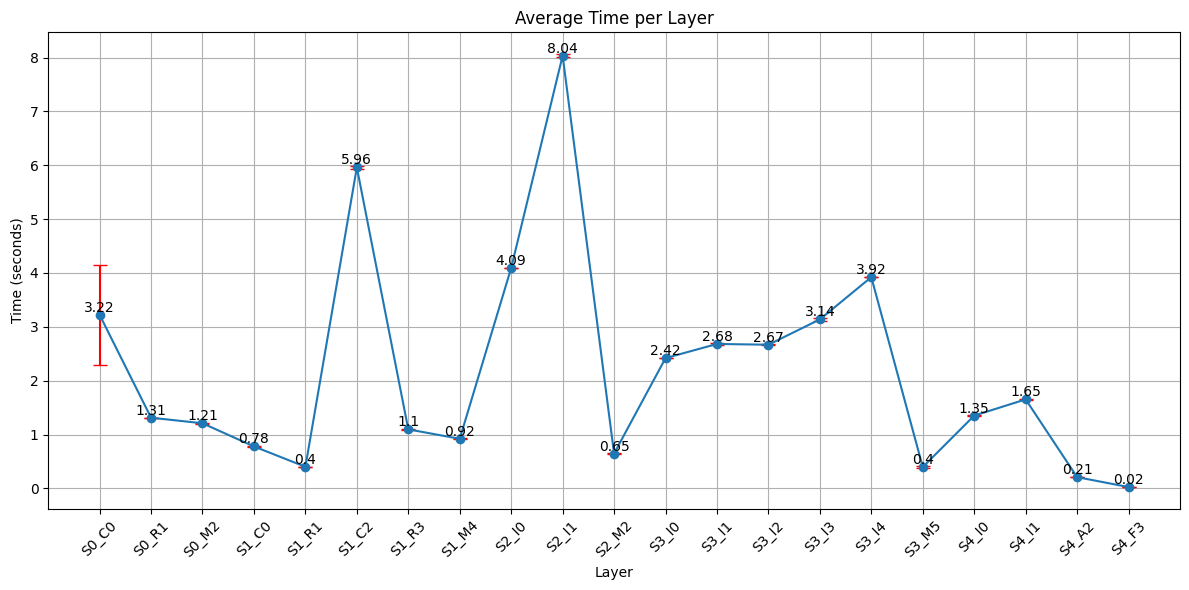

In [8]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [9]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [10]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[4.09505844 4.09079576 4.09398627]
 [7.99961376 8.0336628  8.07583332]
 [2.42097902 2.41391706 2.42124033]
 [2.67127991 2.66922975 2.70554805]
 [2.67219782 2.67596698 2.65466261]
 [3.11693645 3.12807775 3.16878557]
 [3.92664385 3.92181587 3.92111683]
 [1.35459185 1.34994388 1.34901571]
 [1.66619563 1.65164065 1.63903284]]


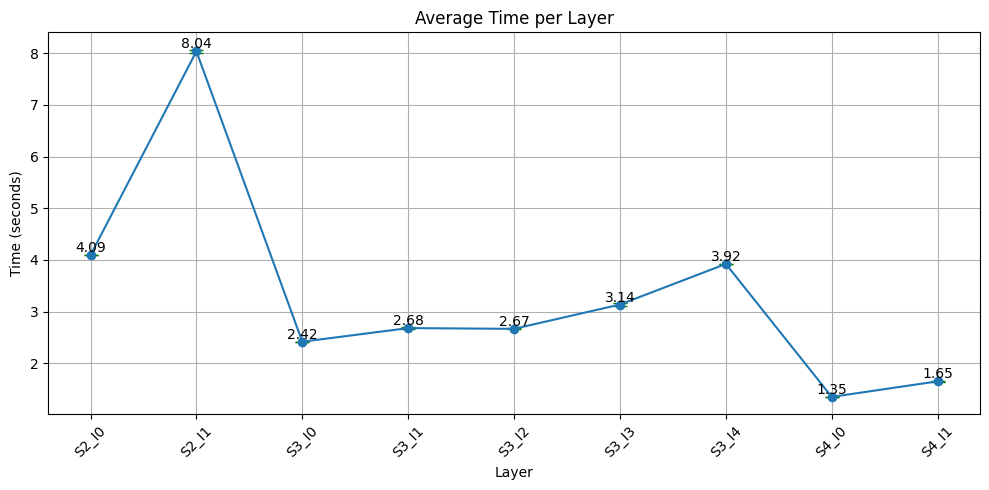

In [11]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

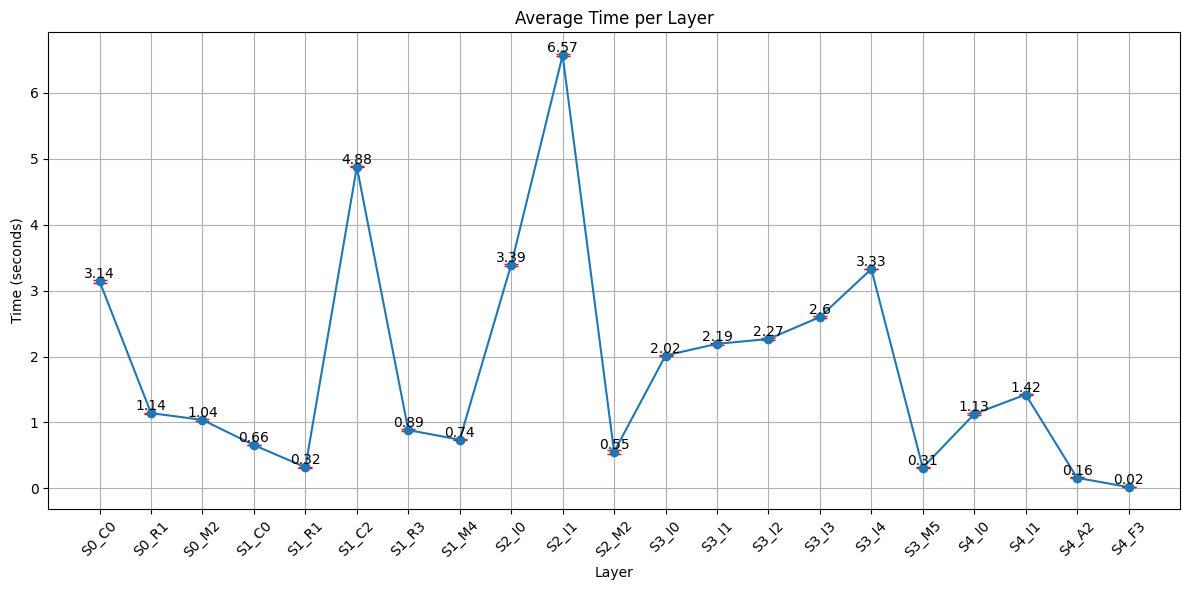

In [12]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [13]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'I' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S2_I0', 'S2_I1', 'S3_I0', 'S3_I1', 'S3_I2', 'S3_I3', 'S3_I4', 'S4_I0', 'S4_I1']
The inception block indexes are [8, 9, 11, 12, 13, 14, 15, 17, 18]


In [14]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[3.38420415 3.41464186 3.38065553]
 [6.56342316 6.54845595 6.59398103]
 [2.0319314  1.99736047 2.01695657]
 [2.16655302 2.19664669 2.21481323]
 [2.28715348 2.25867295 2.25073171]
 [2.58538508 2.59219933 2.61740279]
 [3.33004498 3.32439923 3.32471561]
 [1.11568689 1.13598919 1.13151002]
 [1.41352916 1.43936968 1.41871309]]


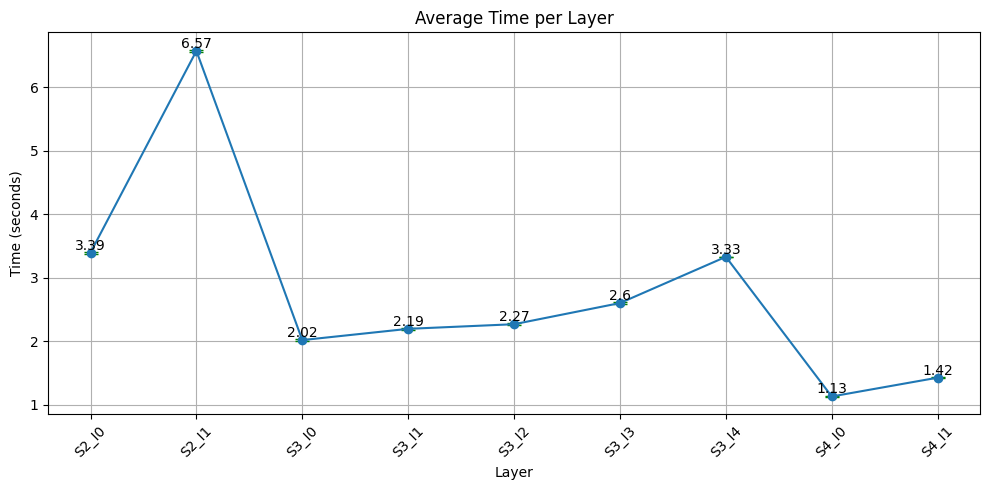

In [15]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [16]:
TrainPartName = ['TimeToDevice', 'Forward', 'Loss', 'Backward', 'Optimization', 'Test']

##### fashionMNIST

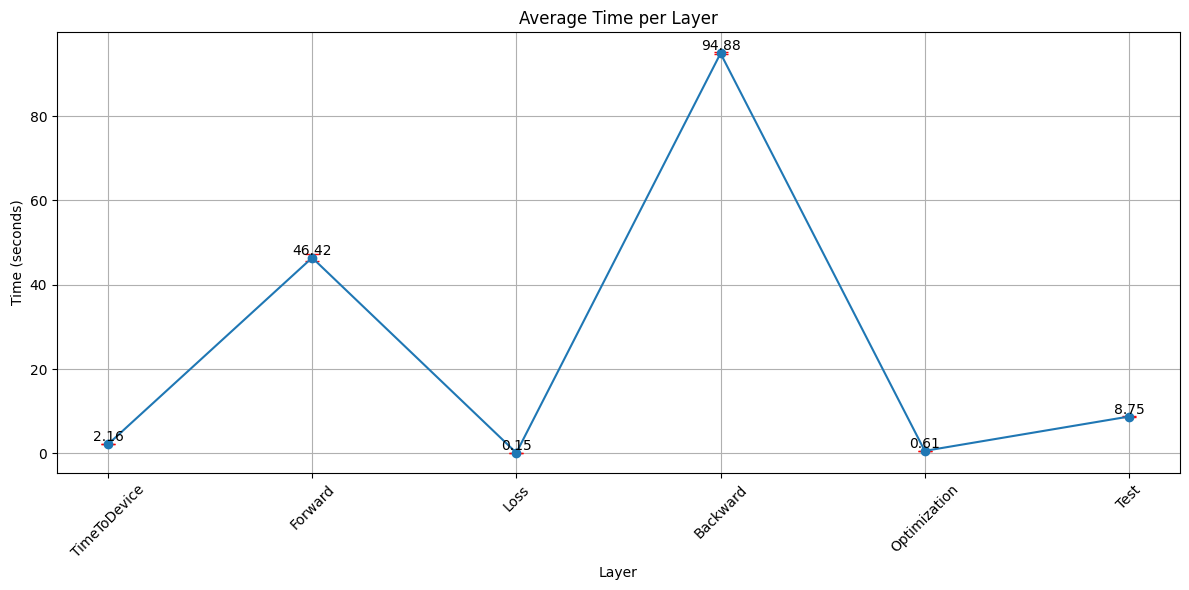

In [17]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

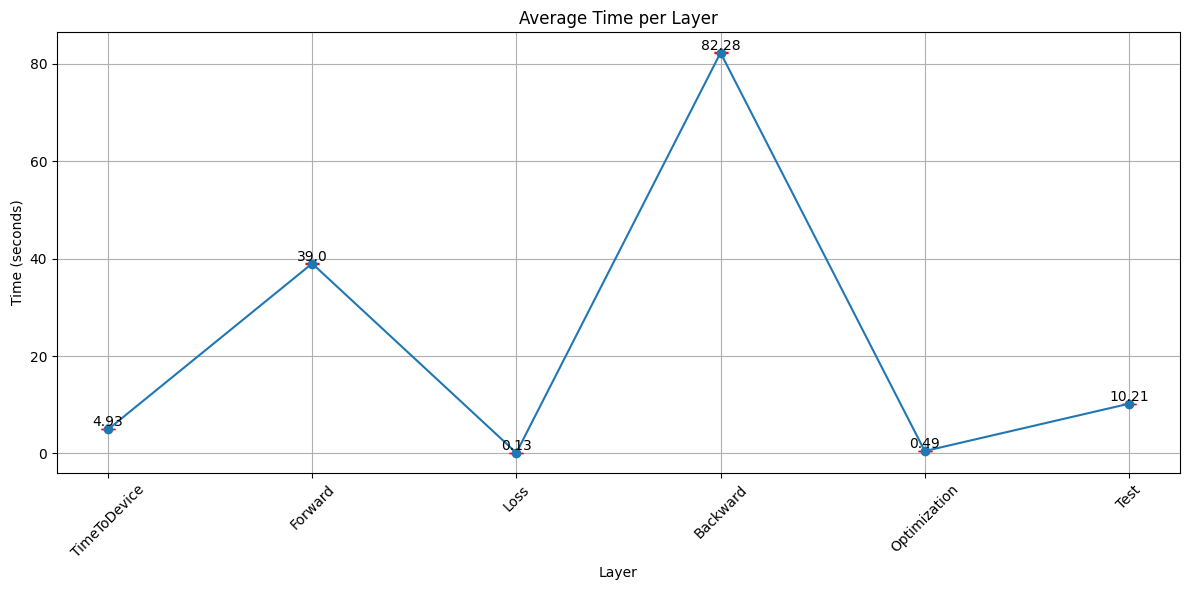

In [18]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [19]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 3) (1, 3)


In [20]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[14700.67 14730.17 14835.71]]
The average energy per epoch is: [[93.04 94.42 94.49]]


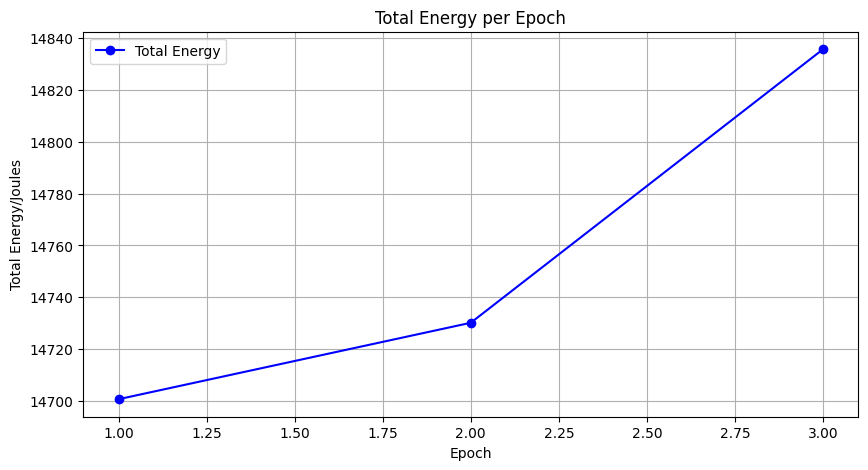

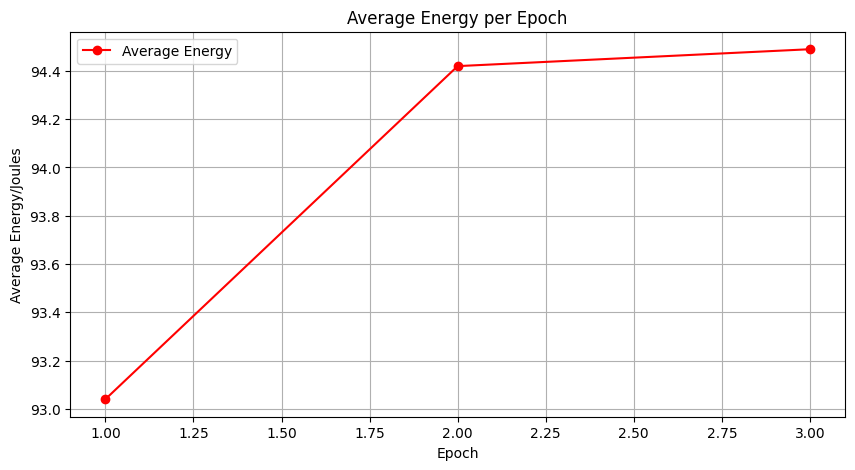

In [22]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

##### cifar100 

In [23]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 3) (1, 3)


In [24]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[13435.53 13528.96 13468.89]]
The average energy per epoch is: [[93.3  93.95 93.53]]


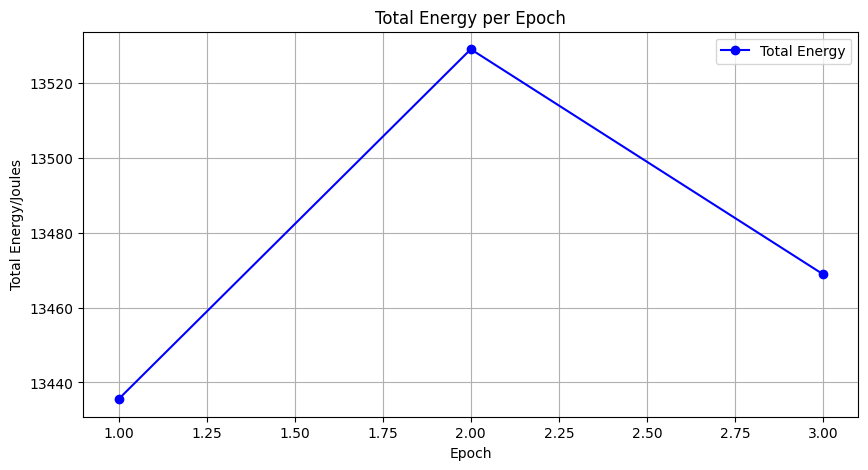

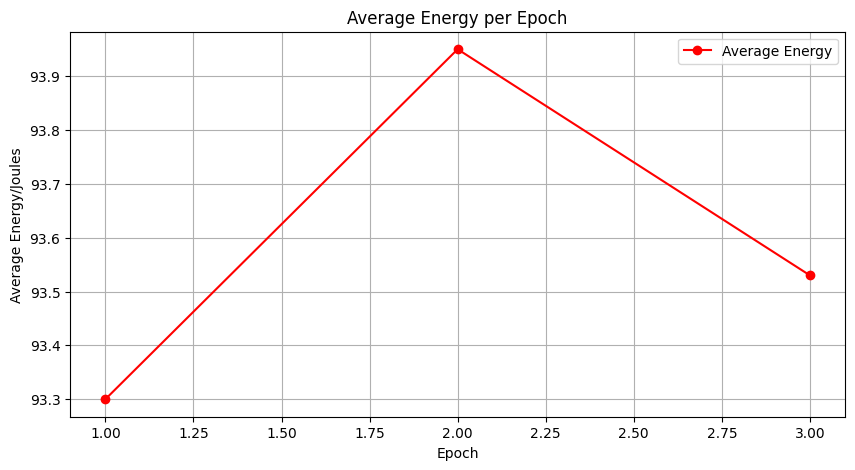

In [26]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
plt.show()

#### EpochTime

##### fashionMNIST

In [27]:
EpochTime_f

array([157.62592697, 155.68332863, 156.59564638])

##### cifar100

In [28]:
EpochTime_c

array([143.4227457 , 143.51961899, 143.83286977])